# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/patrickthornquist/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin', language='en')
btc_headlines

{'status': 'ok',
 'totalResults': 6824,
 'articles': [{'source': {'id': None, 'name': 'New York Times'},
   'author': 'Katie Benner',
   'title': 'Justice Dept. Announces Raft of Changes Meant to Deter Cyberthreats',
   'description': 'The moves came a week after the department made its largest financial seizure ever, confiscating over $3.6 billion worth of Bitcoin stolen in a 2016 hacking.',
   'url': 'https://www.nytimes.com/2022/02/17/us/politics/justice-department-cybersecurity.html',
   'urlToImage': 'https://static01.nyt.com/images/2022/02/17/us/politics/17dc-justice/merlin_199612353_b05bfb07-3da8-404e-8a75-221181e5d014-facebookJumbo.jpg',
   'publishedAt': '2022-02-17T23:51:49Z',
   'content': 'Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]'},
  {'source': {'id': None, 'name': 'New York Times'},
   'author': 'Ali 

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum', language='en')
eth_headlines

{'status': 'ok',
 'totalResults': 2835,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Shanti Escalante-De Mattei',
   'title': 'Web3 Threatens to Segregate Our Online Lives',
   'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
   'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
   'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
   'publishedAt': '2022-03-01T14:00:00Z',
   'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'},
  {'source': {'id': None, 'name': 'Investorplace.com'},
   'author': 'InvestorPlace',
   'title': 'The Market Has Spoken, and I

In [6]:
# Create the Bitcoin sentiment scores DataFrame

btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
1,2022-02-13,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825
2,2022-02-14,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837
3,2022-02-15,The confiscation of the Bitcoin that remained ...,0.6486,0.146,0.000,0.854
4,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,2022-02-16,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964
3,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
4,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.077260,0.069600,0.046950,0.883450
std,0.470906,0.051707,0.065909,0.070813
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.277550,0.044000,0.000000,0.835500
50%,0.038600,0.066000,0.000000,0.870500
75%,0.455475,0.094250,0.097750,0.938500
max,0.778300,0.163000,0.187000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.155640,0.076150,0.032200,0.891600
std,0.414052,0.083462,0.040875,0.090565
min,-0.526700,0.000000,0.000000,0.692000
25%,-0.110175,0.000000,0.000000,0.841000
50%,0.000000,0.057500,0.000000,0.904500
75%,0.528675,0.130250,0.059000,0.958000
max,0.834000,0.249000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score.

Q: Which coin had the highest negative score?

A: Bitcoin had the highest negative score.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = [tokenizer(text) for text in btc_df['text']]

In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(text) for text in eth_df['text']]

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
for tokens in btc_df['tokens']:
    btc_bigram_counts = Counter(ngrams(tokens, n=2))
    print(dict(btc_bigram_counts))

{('even', 'cyberspace'): 1, ('cyberspace', 'department'): 1, ('department', 'justice'): 1, ('justice', 'able'): 1, ('able', 'use'): 1, ('use', 'tried'): 1, ('tried', 'true'): 1, ('true', 'investigative'): 1, ('investigative', 'technique'): 1, ('technique', 'following'): 1, ('following', 'money'): 1, ('money', 'ms'): 1, ('ms', 'monaco'): 1, ('monaco', 'said'): 1, ('said', 'led'): 1, ('led', 'u'): 1, ('u', 'al'): 1, ('al', 'capone'): 1, ('capone', 'helped'): 1, ('helped', 'u'): 1, ('u', 'dest'): 1, ('dest', 'char'): 1}
{('couple', 'would'): 1, ('would', 'never'): 1, ('never', 'flee'): 1, ('flee', 'country'): 1, ('country', 'risk'): 1, ('risk', 'losing'): 1, ('losing', 'access'): 1, ('access', 'ability'): 1, ('ability', 'child'): 1, ('child', 'lawyer'): 1, ('lawyer', 'wroteat'): 1, ('wroteat', 'hearing'): 1, ('hearing', 'prosecutor'): 1, ('prosecutor', 'margaret'): 1, ('margaret', 'lynaugh'): 1, ('lynaugh', 'said'): 1, ('said', 'opposing'): 1, ('opposing', 'bail'): 1, ('bail', 'f'): 1, ('

In [17]:
# Generate the Ethereum N-grams where N=2
for tokens in eth_df['tokens']:
    eth_bigram_counts = Counter(ngrams(tokens, n=2))
    print(dict(eth_bigram_counts))

{('february', 'shit'): 1, ('shit', 'hit'): 1, ('hit', 'fan'): 1, ('fan', 'usual'): 1, ('usual', 'way'): 1, ('way', 'old'): 1, ('old', 'tweet'): 1, ('tweet', 'resurfaced'): 1, ('resurfaced', 'brantly'): 1, ('brantly', 'millegan'): 1, ('millegan', 'director'): 1, ('director', 'operation'): 1, ('operation', 'ethereum'): 1, ('ethereum', 'name'): 1, ('name', 'service'): 1, ('service', 'ens'): 1, ('ens', 'web'): 1, ('web', 'business'): 1, ('business', 'written'): 1, ('written', 'following'): 1, ('following', 'may'): 1, ('may', 'char'): 1}
{('technical', 'analysis'): 1, ('analysis', 'isnt'): 1, ('isnt', 'perfect'): 1, ('perfect', 'tool'): 1, ('tool', 'may'): 1, ('may', 'point'): 1, ('point', 'way'): 1, ('way', 'ethereumethereumethusd'): 1, ('ethereumethereumethusd', 'continues'): 1, ('continues', 'volatile'): 1, ('volatile', 'crypto'): 1, ('crypto', 'investment'): 1, ('investment', 'crypto'): 1, ('crypto', 'volatile'): 1, ('volatile', 'nature'): 1, ('nature', 'im'): 1, ('im', 'setting'): 1, (

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = []
for words in btc_df['tokens']:
    btc_tokens = btc_tokens + words

token_count(btc_tokens, 10)



[('char', 20),
 ('bitcoin', 11),
 ('reuters', 7),
 ('feb', 5),
 ('country', 4),
 ('march', 4),
 ('russia', 4),
 ('salvador', 4),
 ('said', 3),
 ('u', 3)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = []
for words in eth_df['tokens']:
    eth_tokens = eth_tokens + words

token_count(eth_tokens, 10)

[('char', 20),
 ('ha', 6),
 ('past', 6),
 ('crypto', 5),
 ('ethereum', 4),
 ('may', 4),
 ('cryptocurrency', 4),
 ('year', 4),
 ('volume', 4),
 ('newsletter', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

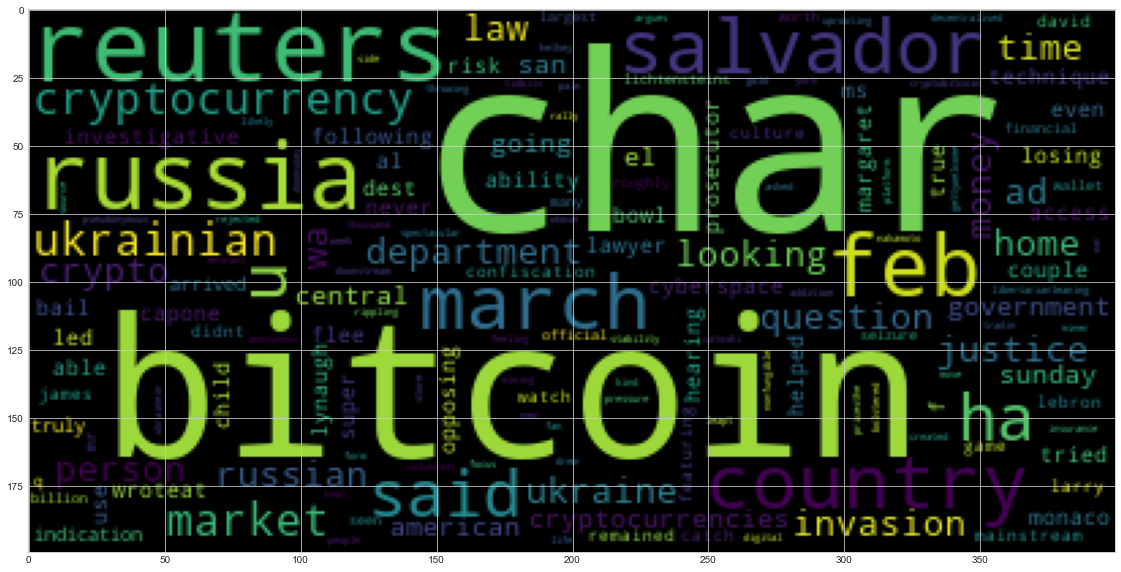

In [22]:
# Generate the Bitcoin word cloud

#btc_tokens_list = btc_df["tokens"].tolist()
#btc_tokens_list

btc_big_string = ' '.join(btc_tokens)
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

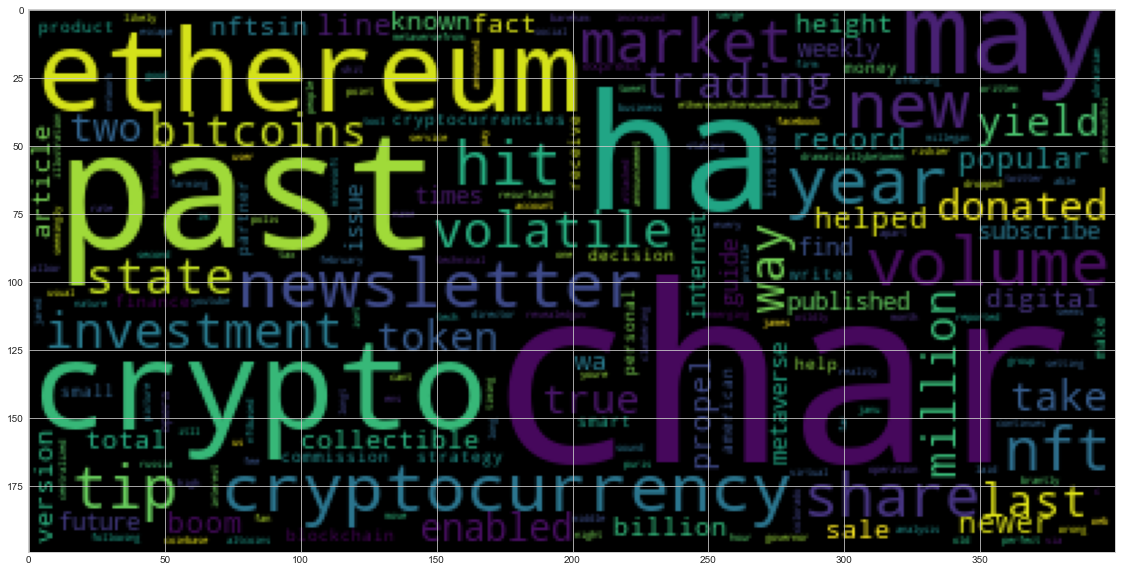

In [23]:
# Generate the Ethereum word cloud

eth_big_string = ' '.join(eth_tokens)
eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together

btc_text = btc_df['text'].str.cat()
btc_text



'Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]The couple would never flee from the country at the risk of losing access to their ability to have children, the lawyer wrote.\r\nAt the hearing, a prosecutor, Margaret Lynaugh, said in opposing bail f… [+1600 chars]If Sundays Super Bowl ads are any indication, crypto has truly arrived in mainstream culture. And if you didnt catch the game, you can watch the ads here, featuring Larry David, LeBron James, and a Q… [+3454 chars]The confiscation of the Bitcoin that remained in Mr. Lichtensteins wallet on Feb. 1, worth roughly $3.6 billion at the time, was the Justice Departments largest financial seizure ever, officials have… [+1442 chars]"Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a form

In [28]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
entities = [ent.text for ent in doc.ents]
entities

['the Department of Justice',
 'Monaco',
 'Al Capone',
 'Margaret Lynaugh',
 'Super Bowl',
 'Larry David',
 'LeBron James',
 '+3454',
 'Lichtensteins',
 'Feb. 1',
 'roughly $3.6 billion',
 'the New York Times',
 '22',
 'Reuters',
 '2021',
 'thousands',
 'Reuters',
 'Russia',
 'Ukraine',
 'Satoshi Nakamoto',
 '2008',
 'Nonfungible Tidbits',
 'this week',
 'Russia',
 'Ukraine',
 'Ukrainians',
 'Russian',
 'YouTube',
 'Alex Castro',
 'Verge',
 'BitConnect',
 'Getty',
 'Russia',
 'last Thursday',
 'Ukranian',
 'Mexico City',
 'Telegr',
 '15',
 'Reuters',
 'Europe',
 'two',
 'Russia',
 'March 4',
 'Reuters',
 'Russia',
 'Ukraine',
 'Russia',
 'Reuters',
 'BITCOIN',
 'Ukrainian',
 'Tom Lee',
 'Ukraine',
 'Summary</li><li>',
 'Law firms</li><li>\r\n',
 'documents</li></ul',
 'Shark Tank',
 "Kevin O'Leary's",
 '100,000',
 '200,000',
 '300,000',
 'two-week',
 'Tuesday',
 'Russians',
 'Ukrainians',
 'Feb 20',
 'Reuters',
 'El Salvador',
 'Nayib Bukele',
 'Sunday',
 'Congress',
 'Central American

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_text = eth_df['text'].str.cat()
eth_text

'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]Technical analysis isnt a perfect tool, but it may point the way for Ethereum\r\nEthereum\xa0(ETH-USD\r\n) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars]People in Colorado will be able to pay their state taxes in cryptocurrency by the middle of this year, the US state\'s governor has revealed.\r\nGov. Jared Polis laid out the timing of the move, a longt… [+2206 chars]Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped dramatically.\xa0\r\nBetween 2020 and 2021, ethereum trading volume in… [+1187 chars]Illustration by James Bareham / The Verge\r\n\n \n\n\n More than $15 million has been donated so far More than $15 million in c

In [32]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
entities = [ent.text for ent in doc.ents]
entities

['February',
 'Ethereum Name Service',
 'ENS',
 'May 201',
 'Ethereum',
 'ETH-USD',
 'Crypto',
 'Colorado',
 'the middle of this year',
 'US',
 'Jared Polis',
 'last year',
 'Between 2020 and 2021',
 'James Bareham',
 'More than $15 million',
 'More than $15 million',
 'Ukrainian',
 'Russia',
 '2022',
 'Facebook',
 'Microsoft',
 'Twitter',
 'Ethereum',
 'second',
 'two months',
 'NFT',
 'two hours',
 'YouTube',
 'Waka Flacka Fla',
 'the past few years',
 'NFT',
 '$23 billion',
 'TIME',
 'weekly',
 'TIME',
 'weekly',
 'Biden',
 'Wednesday',
 'first',
 'Brett Harrison',
 'Bitcoin',
 'the past few years',
 'NFT',
 '$23 billion',
 'Ethereum',
 'American Express',
 'Russia',
 'Ukraine',
 'Opera',
 'Keshas',
 'Opera',
 'Monday',
 'Finance Insider',
 'American Express']

---